In [2]:
#%quickref
%qtconsole

In [3]:
# Load the files for scanning
from matplotlib.pyplot import imshow
import glob, os

target_path = os.path.join(os.getcwd(), "testimages")

print ("Scan for files in {}".format(target_path));

files = glob.glob(os.path.join(target_path, '*.jpg'));
print ("Found {} files".format(len(files)))

# .. for now we assume all are images

Scan for files in /home/ruben/Documents/Projecten/2017/ALLES WAT IK VOEL/testimages
Found 14 files


In [4]:
# load as PIL Images
from PIL import Image
images = [Image.open(file) for file in files]

In [5]:
import numpy as np

arrays = [np.array(image) for image in images]

In [6]:
def getChannelImagesFromImage(arrImg):
    """
    [(255,255,255)] => ( [(255,0,0)], [(0,255,0)], [(0,0,255)] )
    Three separate images that show individual channels
    """
    red = arrImg.copy()
    red[:,:,1] = 0
    red[:,:,2] = 0

    green = arrImg.copy()
    green[:,:,0] = 0
    green[:,:,2] = 0

    blue = arrImg.copy()
    blue[:,:,0] = 0
    blue[:,:,1] = 0
    return (red, green, blue)

# (red,green,blue) = getChannelImagesFromImage(arrays[0])
# print (red)
# images[0].show()
# Image.fromarray(red).show()
# Image.fromarray(green).show()
# Image.fromarray(blue).show()

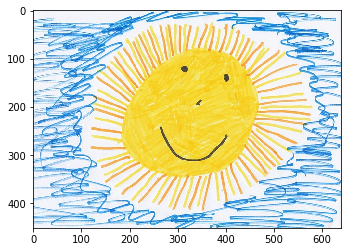

In [16]:
def getImageAsHSV(image):
    hsv = np.array(image.convert('HSV'))

#     If you want to get individual channels use
#     hue = hsv[:,:,0]
#     sat = hsv[:,:,1]
#     val = hsv[:,:,2]

#     hue = hsv.copy()
#     hsv[:,:,0] = 255 #all hue to 100%
#     hsv[:,:,1] = 255 #all saturation to 100%
#     hsv[:,:,2] = 255 #all brightness to 100%
    return hsv

# hue_img = Image.fromarray(getImageAsHSV(images[4]), mode="HSV")

# %matplotlib inline
# imshow(np.asarray(hue_img.convert('RGB')))

452 640 3


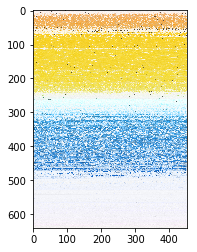

In [10]:
# sorting pixels by hue
# http://stackoverflow.com/a/2828121
# Sort by column: a[a[:,1].argsort()]
hsv = np.array(images[4].convert('HSV'))
print (len(hsv), len(hsv[0]), len(hsv[0,0]))
height = len(hsv)
singleLine = np.concatenate(hsv)
sortedLine = np.array(sorted(singleLine, key=lambda pixel: pixel[0])) # change pixel[0] to 1 or 2 for saturation & brightness
sortedImage = sortedLine.reshape(int(len(sortedLine)/height), height, 3)

sortedImg = Image.fromarray(sortedImage, mode="HSV")

sortedImg.show()

%matplotlib inline
imshow(np.asarray(sortedImg.convert('RGB')))

Total 289280


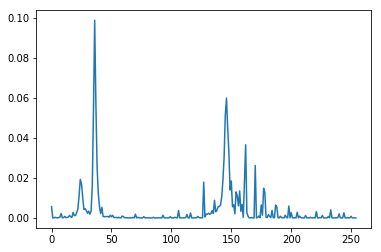

In [63]:
hues = np.zeros(255)

# Get the spread of hue in an image
# for image in images:
image = images[4]
hsv = np.array(image.convert('HSV'))
hue = hsv[:,:,0]
print("Total %s" % len(hue.flatten()))
values, boxes =  scipy.histogram(hue, 255, range=(0,255), density=True)
# print(values)

from pylab import *
plot(values)

In [137]:
import struct
import scipy
import scipy.misc
import scipy.cluster
import codecs
from IPython.display import Markdown, display, HTML

NUM_CLUSTERS = 64

def getColourAsHex(colour):
    return '#' + ''.join(format(c, '02x') for c in colour.astype(int))

def getColoursForImageByClusters(image):
    """
    Adapted on answers by
    Peter Hansen (http://stackoverflow.com/a/3244061)
    & Johan Mickos (http://stackoverflow.com/a/34140327)
    """
    im = image.copy().resize((150, 150))      # optional, to reduce time
    ar = scipy.misc.fromimage(im)
    shape = ar.shape
    ar = ar.reshape(scipy.product(shape[:2]), shape[2])

#     print( 'finding clusters')
    codes, dist = scipy.cluster.vq.kmeans(ar.astype(float), NUM_CLUSTERS)
#     print ('cluster centres:\n', codes)
    
    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences
    
# When only looking for single color:    
#     index_max = scipy.argmax(counts)                    # find most frequent
#     peak = codes[index_max]
#     colour = ''.join(chr(c) for c in peak).encode('hex')
#     print( 'most frequent is %s (#%s)' % (peak, colour))
    
    percentages = 100 * counts / sum(counts)
#     print("Percentages", percentages)
#     colours = [ in codes]
#     print(colours)
    return list(zip(codes, percentages))

def getColoursForImageByPxAvg(image):
    im = image.copy().resize((8, 8))
    pixels = np.concatenate(scipy.misc.fromimage(im))
#     colours = ['#' + ''.join(format(c, '02x') for c in color.astype(int)) for color in pixels]
    percentages = np.zeros(len(pixels)) + (100 / len(pixels))
    return list(zip(pixels, percentages))

def getColoursAsHTML(colours):
    return " ".join(['<span style="background:%s">%s - (%s %%)</span>' % (getColourAsHex(colour[0]), getColourAsHex(colour[0]), colour[1]) for colour in colours]);

# for image in images:
#     display(image)
#     print("Method 1: clustering (%s clusters)" % NUM_CLUSTERS)
#     colours = getColoursForImageByClusters(image)
#     display(HTML(getColoursAsHTML(colours)))
    
#     print("Method 2: scaling")
#     colours = getColoursForImageByPxAvg(image)
#     display(HTML(getColoursAsHTML(colours)))
    
#     break

In [142]:
print("Get colours for all images")
imgColours = []
for image in images:
#     display(image)
    colours = getColoursForImageByClusters(image)
    imgColours.append(colours)
    output = getColoursAsHTML(colours)
    display(HTML(output))


Get colours for all images


In [74]:
hues

for image in images:
    img = image.copy().resize((150, 150)).convert('HSV')      # optional scale, to reduce time
    ar = np.array(img)
    shape = ar.shape
    ar = ar.reshape(scipy.product(shape[:2]), shape[2])
    
    print(ar)
    break
#     Find a way to limit these per image without sacrificing the maximums in the detail
#     Finding maximums, or _clustering_!
    

[[[233   3 166]
  [233   3 167]
  [233   3 167]
  ..., 
  [198   4 173]
  [198   4 172]
  [198   4 172]]

 [[233   3 167]
  [233   3 167]
  [233   3 168]
  ..., 
  [198   4 173]
  [198   4 172]
  [198   4 172]]

 [[233   3 168]
  [233   3 168]
  [233   3 169]
  ..., 
  [198   4 173]
  [198   4 172]
  [198   4 172]]

 ..., 
 [[  7  17 178]
  [  3  16 175]
  [  3  15 177]
  ..., 
  [205   8 174]
  [221   7 172]
  [221   7 171]]

 [[  3 115  75]
  [  3 109  79]
  [  3  99  87]
  ..., 
  [  0  21 164]
  [  2  24 155]
  [  7  29 148]]

 [[ 16 186 111]
  [ 17 179 112]
  [ 17 184 109]
  ..., 
  [ 13 172 105]
  [ 15 177 105]
  [ 15 177 105]]]
[[233   3 166]
 [233   3 167]
 [233   3 167]
 ..., 
 [ 13 172 105]
 [ 15 177 105]
 [ 15 177 105]]


In [153]:
#concatenate found colours of all images into one
allColours = sum(imgColours)

In [182]:
import colorsys
import math

# box 160, because center or circle = 100 => +/- 50 => + r of colour circle (max: 10) => 160
svg = '<svg viewBox="-160 -160 320 320" xmlns="http://www.w3.org/2000/svg">'

radius = 100

for colour in allColours:
    rgb, percentage = colour
    rgbNorm = rgb/255
    hsv = colorsys.rgb_to_hsv(rgbNorm[0], rgbNorm[1], rgbNorm[2])
    # find position on circle
    radians = 2 * math.pi * hsv[0]
    x = math.cos(radians)
    y = math.sin(radians)
    
    # based on saturation, we move inwards/outwards
    # min = 0.5, max = 1.5 (dus + 0.5)
    pos = np.array([x,y]) * (0.5 + hsv[1]) * radius
    # Posibilitiy: determine position based on avg(saturation, value) => dark & grey inside, shiney and colourful outside 
    # pos = np.array([x,y]) * (0.5 + (hsv[1]+hsv[2])/2) * radius
    r = max(1,-10/percentage+10) # as r, we converge to maximum radius 10, but don't want to get smaller radi then 1
    c = '<circle cx="%s" cy="%s" r="%s" style="fill:%s" />' % (pos[0], pos[1], r, getColourAsHex(rgb))
    svg += c

svg += "</svg>"

print (svg)

<svg viewBox="-160 -160 320 320" xmlns="http://www.w3.org/2000/svg"><circle cx="-51.7001271219" cy="38.030374836" r="1.99288256228" style="fill:#2d3530" /><circle cx="-34.4049859725" cy="-88.1541524636" r="2.69480519481" style="fill:#322d51" /><circle cx="55.1844093851" cy="-14.8880599213" r="1" style="fill:#9e9295" /><circle cx="64.1409867305" cy="-11.6760039413" r="1" style="fill:#947d81" /><circle cx="-53.8799118995" cy="-6.67364078148" r="1" style="fill:#aeb5b6" /><circle cx="49.8265732445" cy="63.0938334354" r="1" style="fill:#b9b281" /><circle cx="85.6164653701" cy="-5.97282016149" r="1" style="fill:#a2686c" /><circle cx="-67.7806952611" cy="-57.1290473968" r="1" style="fill:#56688c" /><circle cx="-94.2199518224" cy="-85.5727574281" r="3.38235294118" style="fill:#1a3472" /><circle cx="97.9360437597" cy="99.0421921816" r="2.64705882353" style="fill:#a58111" /><circle cx="136.682664482" cy="30.1582894959" r="1" style="fill:#a32e10" /><circle cx="-72.9827896955" cy="-67.1111153809" 

In [228]:
import json

def coloursToJson(colours):
    colours2 = [(list(colour[0]), colour[1]) for colour in colours]
    return json.dumps(colours2)

def jsonToColours(string):
    data = json.loads(string)
    return [(np.array(d[0]), d[1]) for d in data]


In [229]:
from peewee import *
from playhouse.sqlite_ext import SqliteExtDatabase
import datetime

class ColoursField(TextField):
#     db_field = 'colour'

    def db_value(self, value):
        return coloursToJson(value)

    def python_value(self, value):
        return jsonToColours(value) # convert str to UUID

db = SqliteExtDatabase('images.db')

class BaseModel(Model):
    class Meta:
        database = db
        
class Emotion(BaseModel):
    name = CharField(unique=True)
        
class Group(BaseModel):
    name = CharField(unique=True)

class Artwork(BaseModel):
    author = CharField()
    age = SmallIntegerField(index=True)
    gender = FixedCharField(max_length=1) # we should not really use this one
    group = ForeignKeyField(Group, related_name='artworks', index=True)
    emotion = ForeignKeyField(Emotion, related_name='artworks', index=True)
    created_date = DateTimeField(default=datetime.datetime.now)
    filename = CharField()
    colours = ColoursField() # serialised colours + percentages: [([r,g,b], percentage), ...]

db.connect()
db.create_tables([Emotion, Group, Artwork])

In [230]:
import random
from PIL import Image

emos = ["anger","contempt","disgust","fear","joy","sadness","surprise"]
emotions = []
for emo in emos:
    emotion = Emotion(name=emo)
    emotion.save()
    emotions.append(emotion)

# # Generate some random data:
for i in range(4,8):
    group = Group.create(name='Groep %s' % i)
    group.save()
    
#     some images:
    for j in range(20):
        genders = ['m','f','u']
        img = Artwork()
        img.gender = random.choice(genders)
        img.author = "%s %s%s" %  (img.gender, i,j)
        img.age = i + 4 + random.choice([-1,0,0,0,0,1,1,2])
        img.group = group
        img.emotion = random.choice(emotions)
        img.filename = random.choice(files)
        img.colours = getColoursForImageByClusters(Image.open(img.filename))
        img.save()
        print(img.author)
    

# # No need to set `is_published` or `created_date` since they
# # will just use the default values we specified.
# Tweet.create(user=charlie, message='My first tweet')

m 40
u 41
f 42
f 43
u 44
u 45
f 46
f 47
m 48
f 49
m 410
m 411
f 412
m 413
m 414
f 415
f 416
u 417
f 418
m 419
f 50
f 51
m 52
f 53
u 54
f 55
u 56
f 57
u 58
m 59
u 510
f 511
u 512
m 513
u 514
u 515
u 516
u 517
f 518
m 519
m 60
f 61
f 62
f 63
m 64
m 65
f 66
u 67
f 68
u 69
u 610
m 611
m 612
f 613
m 614
f 615
u 616
u 617
f 618
m 619
u 70
u 71
f 72
f 73
m 74
u 75
m 76
f 77
f 78
u 79
f 710
f 711
u 712
f 713
f 714
u 715
f 716
m 717
m 718
u 719


'[[[179.9060773480663, 181.53867403314916, 182.0331491712707], 1.6088888888888888], [[141.23, 75.99, 98.315], 0.8888888888888888], [[160.1976149914821, 162.10732538330495, 155.62862010221465], 2.6933333333333334], [[152.99333333333334, 94.78, 148.60666666666665], 0.6622222222222223], [[193.77777777777777, 123.0, 168.3939393939394], 0.44], [[168.1039501039501, 170.13617463617464, 166.88149688149687], 4.275555555555556], [[177.01677852348993, 178.6778523489933, 178.19463087248323], 2.648888888888889], [[67.04918032786885, 77.21311475409836, 86.59016393442623], 0.5466666666666666], [[173.30769230769232, 146.56410256410257, 154.9102564102564], 0.3466666666666667], [[150.82228116710874, 93.60212201591511, 120.54111405835543], 1.6755555555555555], [[211.6315789473684, 184.57894736842104, 139.3684210526316], 0.1688888888888889], [[159.63188976377953, 164.77165354330708, 159.78543307086613], 2.2577777777777777], [[167.3994673768309, 170.4247669773635, 170.61517976031956], 3.3377777777777777], 